# Credit Card Fraud Detection

This is a simple **Credit Card Fraud Detection Program** in Python using Machine Learning by implementing: 
    
**Logistic Regression**

**Random Forest Classifier**

**Decision Tree Classifier**


## Instal Dependencies

In [1]:
# Install libs
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Intro

In [2]:
# importing application_data.csv 
# While reading the file you may have to change the path on local system

df = pd.read_csv('creditcard.csv')

In [3]:
# display the first 5 rows of the Dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Dataset analysis and Pre-processing

In [4]:
# get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking the number of missing values in which columns
missing_values = round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2) 
missing_values = pd.concat([missing_values], axis=1, keys=['Total Null Values']).T

# Display missing values
missing_values

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Separate dataset into legit and fraudelent transactions: Imbalanced dataset
legit= df[df.Class==0]
fraud= df[df.Class==1]

legit.shape,fraud.shape

((284315, 31), (492, 31))

**Insight**: Imbance dataset -> to select 429 randomly legit transactions and create a new dataset that it will be used for modelling

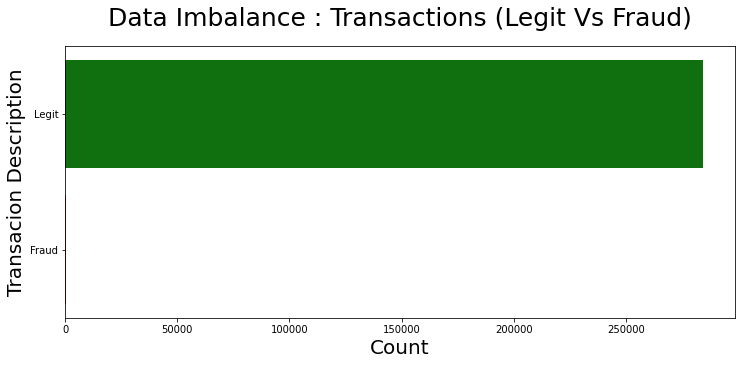

In [44]:
## Plotting a graph for better visualization
plt.figure(figsize= [12,5])
sns.barplot(y=["Legit","Fraud"], x = df["Class"].value_counts(), palette = ["g","r"],orient="h")
plt.ylabel("Transacion Description",fontdict = {"fontsize":20})
plt.xlabel("Count",fontdict = {"fontsize":20})
plt.title("Data Imbalance : Transactions (Legit Vs Fraud)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [8]:
#Ratio of imbalance percentage: Legit Vs Fraud
Legit = round((df["Class"].value_counts()[0]/len(df)* 100),2)
print("Legit Percentage - {}%".format(Legit))
Fraud = round((df["Class"].value_counts()[1]/len(df)* 100),2)
print("Fraud Percentage - {}%".format(Fraud))
print("Imbalance Ratio with respect to Legit and Fraud is given - {0:.2f}:1 (approx)".format(Legit/Fraud))

Legit Percentage - 99.83%
Fraud Percentage - 0.17%
Imbalance Ratio with respect to Legit and Fraud is given - 587.24:1 (approx)


In [9]:
# To balance fraud and legit transactions in dataset : Select 492 randomly legit transactiosn from the dataset

legit_sample = legit.sample(n=492)

In [10]:
# Join two DataFrame ( Legit and Fraud) by creating a new dataset
data = pd.concat([legit_sample, fraud], axis=0)

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49334,44009.0,1.137568,-0.163174,-1.266944,0.127717,2.118298,3.411432,-0.344932,0.779102,-0.156193,...,0.064748,-0.092523,-0.214229,1.011615,0.804653,-0.273804,0.005801,0.028975,82.90,0
84620,60390.0,1.171145,0.648165,-0.247576,1.383095,0.066268,-0.972788,0.205987,-0.098202,-0.038249,...,-0.024674,0.009764,-0.047571,0.252583,0.557250,-0.316142,0.048759,0.056275,1.00,0
151965,96582.0,1.925853,-0.341952,-0.138572,0.741851,-0.684846,-0.506020,-0.607192,-0.196098,2.645058,...,0.121930,0.840447,0.050846,-0.027165,-0.046314,-0.196900,0.014397,-0.037490,39.83,0
270366,164043.0,2.347749,-0.975936,-2.385499,-1.499464,-0.345304,-1.806849,0.137097,-0.740212,-2.161629,...,0.141562,0.936511,-0.167725,0.057481,0.640533,0.300909,-0.069114,-0.083407,38.89,0
60783,49503.0,-0.827828,1.525677,1.505072,2.598416,0.034954,1.018916,-0.107902,0.943282,-1.712664,...,-0.056729,-0.238311,0.121461,-0.362996,-0.604215,0.007886,0.276736,0.119683,6.20,0


In [12]:
# Checking shape on the new dataset: Balance dataset
data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

**Insight**: New dataset created and the dataset is balanced now.

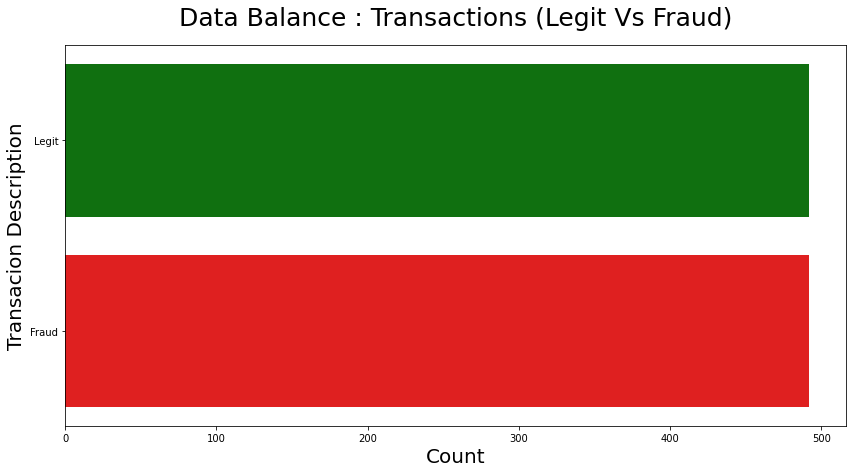

In [13]:
## Plotting a graph for better visualization
plt.figure(figsize= [14,7])
sns.barplot(y=["Legit","Fraud"], x = data["Class"].value_counts(), palette = ["g","r"],orient="h")
plt.ylabel("Transacion Description",fontdict = {"fontsize":20})
plt.xlabel("Count",fontdict = {"fontsize":20})
plt.title("Data Balance : Transactions (Legit Vs Fraud)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [14]:
# Compare the legit vs fraud values: Using the dataset mean to compare the Legit Vs Fraud transactions.
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92988.221545,-0.145128,-0.081030,0.014834,-0.061295,0.099871,-0.014174,0.020184,-0.002743,-0.098001,...,-0.054842,-0.023777,-0.001417,-0.023177,0.02602,-0.001917,-0.001932,-0.010854,-0.010913,88.590976
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
# Mean and Standard-Deviation for all features: Checking if the dataset is normalized
feat = data.drop(['Class'], axis = 1)
feat.describe().loc[['mean', 'std']]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
mean,86867.514228,-2.458538,1.771374,-3.509223,2.240367,-1.525677,-0.705955,-2.774274,0.283947,-1.339562,...,0.158739,0.344905,0.006316,-0.031743,-0.039555,0.019766,0.024858,0.079860,0.032377,105.401148
std,47838.467736,5.506532,3.734534,6.220726,3.224043,4.308106,1.829587,5.911478,4.862156,2.286139,...,1.167131,2.790511,1.159460,1.218719,0.548636,0.688994,0.481423,1.020088,0.439030,274.948433


**Insight**: V1-v28 are already standardized with mean = 0 and standard deviation = 1.

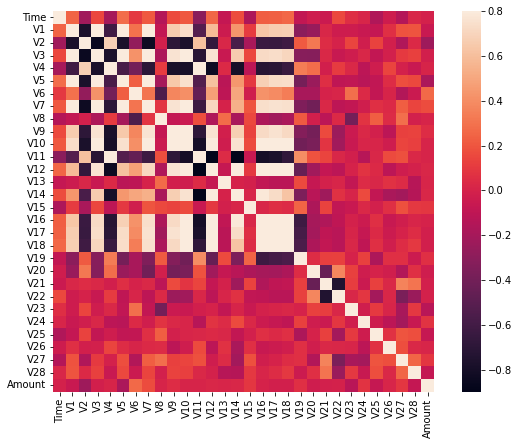

In [16]:
# Plotting the Correlation Matrix: Checking the degree of relationship between dataset elements

corr_data = feat.corr()
fig = plt.figure(figsize = (10, 7))
sns.heatmap(corr_data, vmax = .8, square = True)
plt.show()

**Insight**: Features are not correlated -> No feature will be droppped 

In [17]:
# Scaling the data: RobustScaler is less prone to outliers 
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(
    data['Amount'].values.reshape(-1, 1))

data['scaled_time'] = rob_scaler.fit_transform(
    data['Time'].values.reshape(-1, 1))
    
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
49334,1.137568,-0.163174,-1.266944,0.127717,2.118298,3.411432,-0.344932,0.779102,-0.156193,0.089207,...,-0.092523,-0.214229,1.011615,0.804653,-0.273804,0.005801,0.028975,0,0.649858,-0.406822
84620,1.171145,0.648165,-0.247576,1.383095,0.066268,-0.972788,0.205987,-0.098202,-0.038249,-0.710898,...,0.009764,-0.047571,0.252583,0.557250,-0.316142,0.048759,0.056275,0,-0.182798,-0.218439
151965,1.925853,-0.341952,-0.138572,0.741851,-0.684846,-0.506020,-0.607192,-0.196098,2.645058,-0.568220,...,0.840447,0.050846,-0.027165,-0.046314,-0.196900,0.014397,-0.037490,0,0.211976,0.197773
270366,2.347749,-0.975936,-2.385499,-1.499464,-0.345304,-1.806849,0.137097,-0.740212,-2.161629,1.721556,...,0.936511,-0.167725,0.057481,0.640533,0.300909,-0.069114,-0.083407,0,0.202420,0.973581
60783,-0.827828,1.525677,1.505072,2.598416,0.034954,1.018916,-0.107902,0.943282,-1.712664,0.735173,...,-0.238311,0.121461,-0.362996,-0.604215,0.007886,0.276736,0.119683,0,-0.129931,-0.343640


### Splitting dataset into **features** and **target**

In [18]:
# Splitting datset into X:Features and y:Target

X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [19]:
print(X)

[[ 1.13756838 -0.16317383 -1.26694427 ...  0.02897484  0.64985767
  -0.40682186]
 [ 1.17114505  0.64816455 -0.24757592 ...  0.05627523 -0.18279789
  -0.21843869]
 [ 1.92585349 -0.34195189 -0.138572   ... -0.0374895   0.21197641
   0.19777301]
 ...
 [-0.67614267  1.12636606 -2.21369952 ...  0.19436148  0.59892233
   1.03462393]
 [-3.11383161  0.58586417 -5.39973021 ... -0.25370032  2.29788532
   1.0416965 ]
 [ 1.9919761   0.15847589 -2.58344065 ... -0.01530881  0.2394266
   1.04608953]]


In [20]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

## 3. Modelling 

### Train-Test Split

In [21]:
# split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.90,
                                                    stratify=y, 
                                                    random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (885, 30) (99, 30)


In [22]:
# Function used in cross-validation to return F1 score 
def fun(est, X, y):
    pred = est.predict(X)
    return f1_score(y, pred)

## Logistic Regression

In [23]:
# training ml model --> Logistic Regression
lr = LogisticRegression(solver='liblinear', max_iter=500)
lr = lr.fit(X_train, y_train)

In [24]:
lr.coef_

array([[ 0.12213236,  0.09024528, -0.1320184 ,  0.80042245,  0.25824292,
        -0.35976505,  0.0512469 , -0.62619097, -0.00667358, -0.34769069,
         0.36554849, -0.52795151, -0.28101408, -1.01359207, -0.22417653,
        -0.41827632, -0.32864544, -0.30546786, -0.10729102, -0.28835915,
         0.0461273 ,  0.69100798, -0.02939767,  0.09823963, -0.03744012,
        -0.08969643,  0.52737619,  0.23345851,  0.31736361, -0.76066251]])

## Evaluation

In [25]:
# checking the AUC ROC score on both training and validation data set
AUC_ROC_Score_train= roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
AUC_ROC_Score_test= roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

print(f"AUC_ROC Score for Logistic regression on training data is: {AUC_ROC_Score_train}")
print(f"AUC_ROC Score for Logistic regression on validation data is: {AUC_ROC_Score_test}")

AUC_ROC Score for Logistic regression on training data is: 0.9876970062204427
AUC_ROC Score for Logistic regression on validation data is: 0.9791836734693877


In [26]:
#Accuracy scores
Y_predicted_lr = lr.predict(X_test)
Y_pred_train_lr = lr.predict(X_train)

In [27]:
# print('\n Confusion Matrix \n')
# print(confusion_matrix(Y_predicted_model, y_test))

# ac = accuracy_score(y_test, Y_predicted_model)
# print('\n Macro Averaged Accuracy :'+str(ac))

# pr = precision_score(y_test, Y_predicted_model, average='macro')
# print('\n Macro Averaged Precision :'+str(pr))

# re = recall_score(y_test, Y_predicted_model, average='macro')
# print('\n Macro Averaged Recall :'+str(re))

# fm = f1_score(y_test, Y_predicted_model, average='macro')
# print('\n Macro Averaged F1-Score :'+str(fm))

# fm = f1_score(y_test, Y_predicted_model, average='micro')
# print('\n Micro Averaged F1-Score:'+str(fm))

Accuracy of Logistic Regression model:  0.9090909090909091
F1 score of Logistic Regression model:  0.9072164948453607


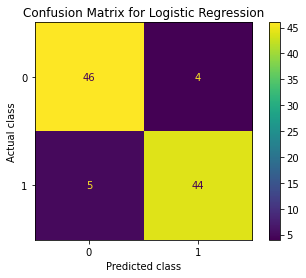

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        50
           1       0.92      0.90      0.91        49

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99



In [28]:
# Displaying Confusion Matrix For Logistic Regression

print('Accuracy of Logistic Regression model: ', accuracy_score(y_test, Y_predicted_lr))
print('F1 score of Logistic Regression model: ', f1_score(y_test, Y_predicted_lr))
plot_confusion_matrix(lr, X_test, y_test)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

print('Classification Report:')
print(classification_report(y_test, Y_predicted_lr))

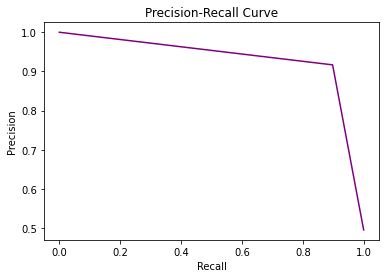

In [29]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, Y_predicted_lr)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## Randon Forest Classifier

In [30]:
# Random Forest Classifier

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

### Evaluation

In [31]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
print("On training data, RF Classifier has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("On test data, RF Classifier has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, RF Classifier has a AUCROC Score of: 99.23546775890422
On test data, RF Classifier has a AUCROC Score of: 96.48979591836735


Accuracy of Random Forest Classifier:  0.9191919191919192
F1 score of Random Forest Classifier:  0.9148936170212767


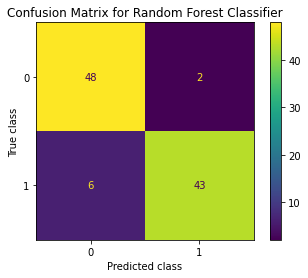

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        50
           1       0.96      0.88      0.91        49

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



In [32]:
# Displaying Confusion Matrix For Randon Forest Claasifier

print('Accuracy of Random Forest Classifier: ', accuracy_score(y_test, rf_predict))
print('F1 score of Random Forest Classifier: ', f1_score(y_test, rf_predict))
plot_confusion_matrix(rf, X_test, y_test)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

print('Classification Report:')
print(classification_report(y_test, rf_predict))

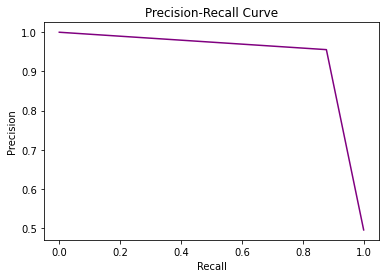

In [33]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, rf_predict)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## Decision Tree Classifier

In [34]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [35]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])
print("On training data, RF Classifier has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
print("On test data, RF Classifier has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, RF Classifier has a AUCROC Score of: 98.65657845009858
On test data, RF Classifier has a AUCROC Score of: 92.93877551020408


Accuracy of Decision Tree Classifier:  0.898989898989899
F1 score of Decision Tree Classifier:  0.8958333333333333


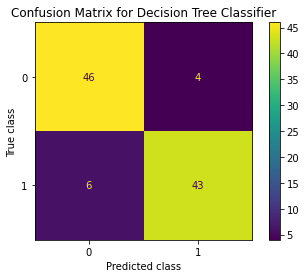

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.91      0.88      0.90        49

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99



In [36]:
# Displaying Confusion Matrix For Decision Tree Classifier

print('Accuracy of Decision Tree Classifier: ', accuracy_score(y_test, dt_predict))
print('F1 score of Decision Tree Classifier: ', f1_score(y_test, dt_predict))
plot_confusion_matrix(dt, X_test, y_test)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

print('Classification Report:')
print(classification_report(y_test, dt_predict))

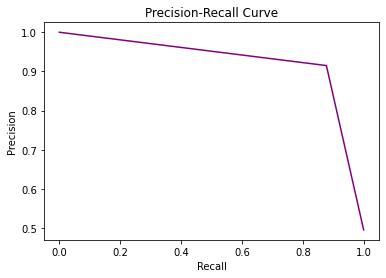

In [37]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, dt_predict)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

[Text(451.32352941176475, 489.24, 'X[13] <= -2.887\nentropy = 1.0\nsamples = 885\nvalue = [442, 443]'),
 Text(164.11764705882354, 380.52000000000004, 'X[15] <= 2.897\nentropy = 0.027\nsamples = 371\nvalue = [1, 370]'),
 Text(82.05882352941177, 271.8, 'entropy = 0.0\nsamples = 370\nvalue = [0, 370]'),
 Text(246.1764705882353, 271.8, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(738.5294117647059, 380.52000000000004, 'X[3] <= 1.65\nentropy = 0.59\nsamples = 514\nvalue = [441, 73]'),
 Text(410.29411764705884, 271.8, 'X[28] <= 2.182\nentropy = 0.396\nsamples = 447\nvalue = [412, 35]'),
 Text(246.1764705882353, 163.08000000000004, 'X[13] <= -0.491\nentropy = 0.29\nsamples = 413\nvalue = [392, 21]'),
 Text(164.11764705882354, 54.360000000000014, 'entropy = 0.639\nsamples = 105\nvalue = [88, 17]'),
 Text(328.2352941176471, 54.360000000000014, 'entropy = 0.1\nsamples = 308\nvalue = [304, 4]'),
 Text(574.4117647058824, 163.08000000000004, 'X[6] <= 0.687\nentropy = 0.977\nsamples = 34\nva

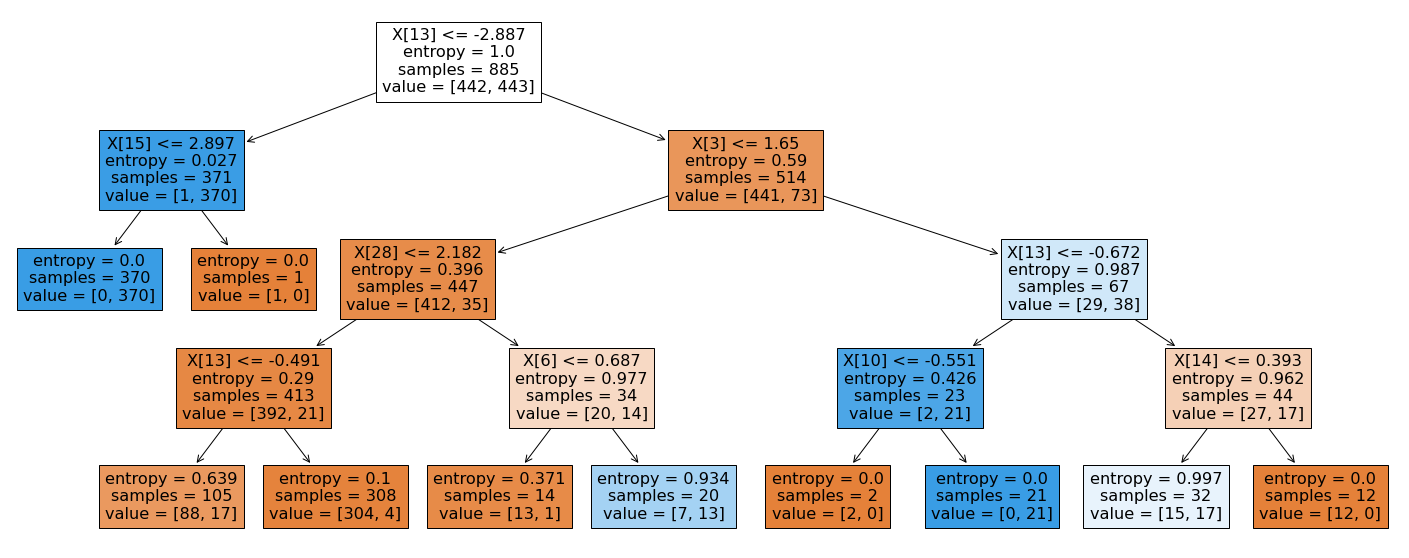

In [38]:
plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True)

In [39]:
## Outcome

In [40]:
# models
models = {
    "LogisticRegression": lr,
    "RandomForest": rf,
    "DecisionTreeClassifier": dt,
}

# function to fetch scores
def train_model():
    for key, model in models.items():
        model.fit(X_train, y_train)
        AUC_ROC_Score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        f1_val = f1_score(y_test, model.predict(X_test), average='macro')
        print(f"{key} has an AUC-ROC Score and Macro-averaged F1-score of: {AUC_ROC_Score} and {f1_val}")


# function call
train_model()

LogisticRegression has an AUC-ROC Score and Macro-averaged F1-score of: 0.9791836734693877 and 0.9090537919771358
RandomForest has an AUC-ROC Score and Macro-averaged F1-score of: 0.9677551020408164 and 0.9189852700490999
DecisionTreeClassifier has an AUC-ROC Score and Macro-averaged F1-score of: 0.9293877551020407 and 0.8988970588235294


## Selecting Best Model

In [41]:
# Macro averaged F1 score of all models on the validation data set
f1_lr = f1_score(y_test, Y_predicted_lr, average='macro')
f1_rf = f1_score(y_test, rf_predict, average='macro')
f1_dt = f1_score(y_test, dt_predict, average='macro')

In [42]:
# choosing the best classifier based on Macro-averaged F1 Score
best_score = None
best_model = None
if f1_dt>f1_rf:
    if f1_dt>f1_lr:
        best_score = f1_dt
        best_model = "Decision Tree"
    else:
        best_score = f1_lr
        best_model = "Logistic Regression"
else:
    if f1_rf>f1_lr:
        best_score = f1_rf
        best_model = "Random Forest"
    else:
        best_score = f1_lr
        best_model = "Logistic Regression"

In [43]:
print(best_score)
print(best_model)

0.9189852700490999
Random Forest
